#EXPLORACIÓN Y PROCESADO DE DATOS

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os         ##PARA CAMBIAR EL DIRECTORIO
!git clone https://github.com/CarlosCastano33/Prediccion-de-cancelacion-de-reserva.git

Cloning into 'Prediccion-de-cancelacion-de-reserva'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 39 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), 7.12 MiB | 6.01 MiB/s, done.


In [ ]:
!pwd

/content/Prediccion-de-cancelacion-de-reserva


In [ ]:
#Para entrar:
os.chdir('/content/Prediccion-de-cancelacion-de-reserva')

In [ ]:
#Para salir:
#os.chdir('..')

In [ ]:
!ls

 01_exploración_de_datos.ipynb		     sample_submission.csv
'Predicción de cancelación de reserva.pdf'   test.csv
 PROYECTO_ENTREGA2.pdf			     train.csv
 README.md				    'train XLS After-Fill 2.csv'


In [ ]:
d_train = pd.read_csv("train.csv")
d_train.tail()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,67.5,no_of_special_requests,booking_status
28063,28063,2,0,0,1,0,0,0,122,NaN,NaN,NaN,1,0,0,0,135.99,0,0
28064,28064,2,0,2,2,0,0,3,57,NaN,NaN,NaN,1,0,0,0,177.30,3,0
28065,28065,2,2,0,3,0,0,3,78,NaN,NaN,NaN,1,0,0,0,49.50,0,0
28066,28066,1,0,1,2,0,0,0,191,NaN,NaN,NaN,0,0,0,0,55.00,0,0
28067,28067,2,0,0,2,0,0,0,0,NaN,NaN,NaN,0,0,0,0,NaN,0,0


Valores perdidos en columnas

In [ ]:
## KEEPOUTPUT
k = d_train.isna().sum()
k[k!=0]

arrival_year     1500
arrival_month    1500
arrival_date     1500
67.5                1
dtype: int64

In [ ]:
d_test = pd.read_csv("test.csv")
d_test.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [ ]:
## ENCONTRAMOS QUE HAY UNA COLUMNA QUE SE LLAMA '67.5', QUIZÁ PERDIÓ SU NOMBRE AL INSERTAR LOS DATOS
## TOMANDO COMO REFERENCIA EL ARCHIVO TEST DESCUBRIMOS QUE LA COLUMNA SE LLAMA EN REALIDAD 'avg_price_per_room'
## ASUMIMOS QUE PUDO HABER SIDO ERROR DE LA PERSONA QUE COPIÓ DE ALGÚN LUGAR LA COLUMNA, Y LA PEGÓ EN EL ARCHIVO TRAIN
## PERO APUNTÓ MAL Y LA COLOCÓ EN EL TITULO
d_train_copy = d_train.copy()
d_train_copy['67.5'] = d_train_copy['67.5'].shift(1)
d_train_copy['67.5'][0] = 67.5
d_train_copy = d_train_copy.rename(columns={'67.5': 'avg_price_per_room'})
d_train = d_train_copy
d_train

<ipython-input-30-a62244bae679>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_train_copy['67.5'][0] = 67.5


,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018.0,1.0,14.0,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018.0,7.0,29.0,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018.0,12.0,2.0,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018.0,12.0,1.0,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018.0,10.0,16.0,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,28063,2,0,0,1,0,0,0,122,NaN,NaN,NaN,1,0,0,0,105.30,0,0
28064,28064,2,0,2,2,0,0,3,57,NaN,NaN,NaN,1,0,0,0,135.99,3,0
28065,28065,2,2,0,3,0,0,3,78,NaN,NaN,NaN,1,0,0,0,177.30,0,0
28066,28066,1,0,1,2,0,0,0,191,NaN,NaN,NaN,0,0,0,0,49.50,0,0


In [ ]:
k = d_train.isna().sum()
k[k!=0]

arrival_year     1500
arrival_month    1500
arrival_date     1500
dtype: int64

In [ ]:
#CON LA INFORMACIÓN RECUPERADA
d_train = pd.read_csv("train XLS After-Fill 2.csv", sep=';')
d_train

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,28063,2,0,0,1,0,0,0,122,2018,12,27,1,0,0,0,105.30,0,0
28064,28064,2,0,2,2,0,0,3,57,2018,6,27,1,0,0,0,135.99,3,0
28065,28065,2,2,0,3,0,0,3,78,2018,10,25,1,0,0,0,177.30,0,0
28066,28066,1,0,1,2,0,0,0,191,2018,6,30,0,0,0,0,49.50,0,0


In [ ]:
k = d_train.isna().sum()
k[k!=0]

Series([], dtype: int64)

## Inspect the target variable

<Axes: xlabel='booking_status', ylabel='Count'>

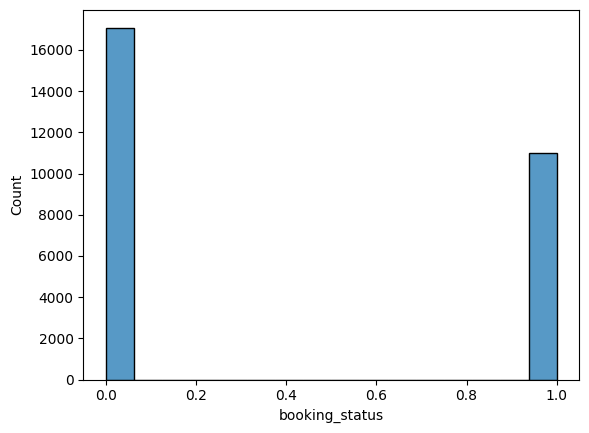

In [ ]:
sns.histplot(d_train['booking_status'])

In [ ]:
bs = d_train.booking_status
zeros = bs.value_counts(normalize=True)[0]
unos = bs.value_counts(normalize=True)[1]
print("Canceladas: {:.2%}, Habilitadas: {:.2%}".format(zeros, unos))


Canceladas: 60.86%, Habilitadas: 39.14%


## Discover data types

In [ ]:
## KEEPOUTPUT
for c in d_train_copy.columns:
    print ("%20s"%c, d_train_copy[c].dtype)

                  id int64
        no_of_adults int64
      no_of_children int64
no_of_weekend_nights int64
   no_of_week_nights int64
   type_of_meal_plan int64
required_car_parking_space int64
  room_type_reserved int64
           lead_time int64
        arrival_year float64
       arrival_month float64
        arrival_date float64
 market_segment_type int64
      repeated_guest int64
no_of_previous_cancellations int64
no_of_previous_bookings_not_canceled int64
  avg_price_per_room float64
no_of_special_requests int64
      booking_status int64


## Inspect numeric columns

In [ ]:
## KEEPOUTPUT
d_train._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
id,28068.0,14033.500000,8102.678014,0.0,7016.75,14033.50,21050.25,28067.0
no_of_adults,28068.0,1.918092,0.524414,0.0,2.00,2.00,2.00,4.0
no_of_children,28068.0,0.141050,0.450040,0.0,0.00,0.00,0.00,9.0
no_of_weekend_nights,28068.0,0.886561,0.886047,0.0,0.00,1.00,2.00,6.0
no_of_week_nights,28068.0,2.400777,1.424664,0.0,1.00,2.00,3.00,17.0
type_of_meal_plan,28068.0,0.238635,0.586411,0.0,0.00,0.00,0.00,3.0
required_car_parking_space,28068.0,0.024619,0.154963,0.0,0.00,0.00,0.00,1.0
room_type_reserved,28068.0,0.428495,0.833387,0.0,0.00,0.00,1.00,6.0
lead_time,28068.0,103.940858,80.974753,0.0,37.00,93.00,155.00,443.0
arrival_year,28068.0,2017.864116,0.342672,2017.0,2018.00,2018.00,2018.00,2018.0


In [ ]:
print (d_train.shape)
d_train

(28068, 19)


,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,28063,2,0,0,1,0,0,0,122,2018,12,27,1,0,0,0,105.30,0,0
28064,28064,2,0,2,2,0,0,3,57,2018,6,27,1,0,0,0,135.99,3,0
28065,28065,2,2,0,3,0,0,3,78,2018,10,25,1,0,0,0,177.30,0,0
28066,28066,1,0,1,2,0,0,0,191,2018,6,30,0,0,0,0,49.50,0,0


In [ ]:
## ESTOS DEBEMOS APLICARLE EL GET.DUMMIES()
print(d_train.type_of_meal_plan.unique())
### ESTE TAMBIEN
print(d_train.room_type_reserved.unique())
### tambien
print(d_train.market_segment_type.unique())

[1 0 2 3]
[0 2 3 1 4 5 6]
[1 0 2 3 4]


In [ ]:
d_train.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
import pandas as pd
def apply_get_dummies(dataframe, column_names):
    new_df = dataframe.copy()
        
    for column_name in column_names:
        if column_name in new_df.columns:
          dummies = pd.get_dummies(new_df[column_name], prefix=column_name)
          new_df = pd.concat([new_df, dummies], axis=1)
          del new_df[column_name]
    return new_df


In [ ]:
columnas = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
d_train = apply_get_dummies(d_train, columnas)
d_test = apply_get_dummies(d_test, columnas)

In [ ]:
serie = d_train.booking_status.copy()
del d_train['booking_status']
d_train = pd.concat([d_train, serie], axis=1)

In [ ]:
d_train.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_0', 'type_of_meal_plan_1', 'type_of_meal_plan_2',
       'type_of_meal_plan_3', 'room_type_reserved_0', 'room_type_reserved_1',
       'room_type_reserved_2', 'room_type_reserved_3', 'room_type_reserved_4',
       'room_type_reserved_5', 'room_type_reserved_6', 'market_segment_type_0',
       'market_segment_type_1', 'market_segment_type_2',
       'market_segment_type_3', 'market_segment_type_4'],
      dtype='object')

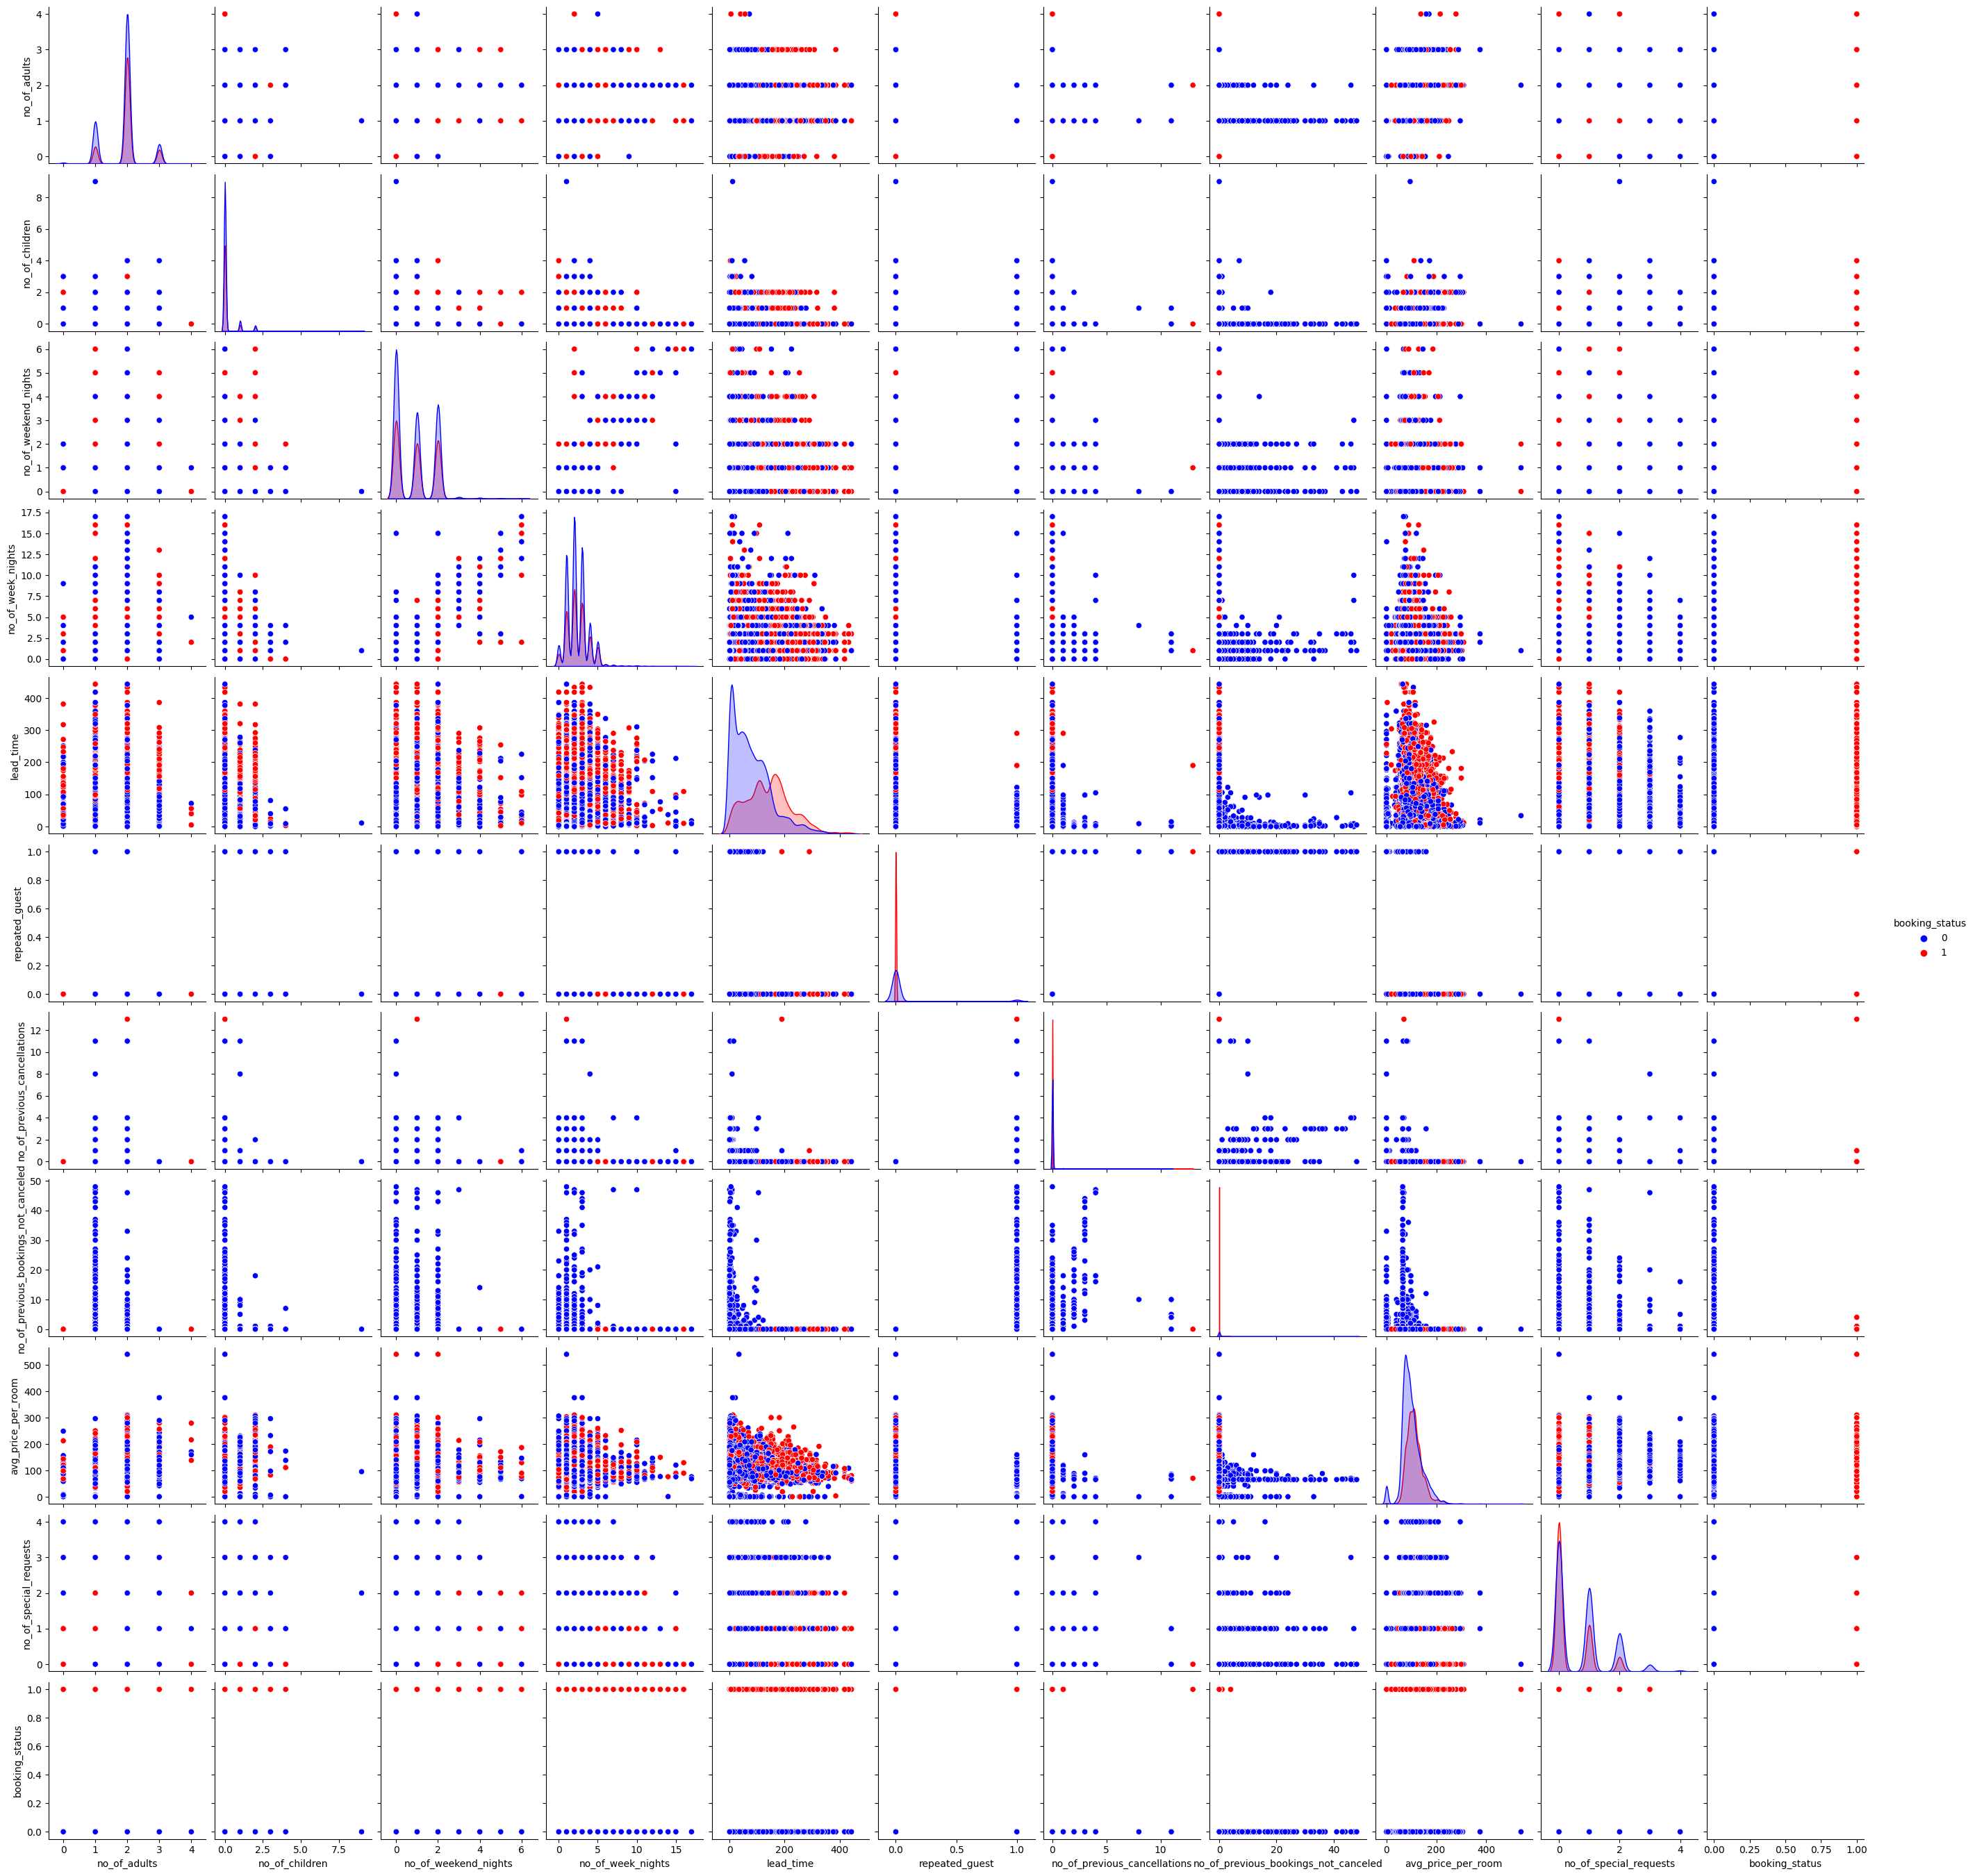

In [ ]:
import seaborn as sns

# separar los datos según el valor de la variable objetivo
grupo_0 = d_train.loc[d_train['booking_status'] == 0]
grupo_1 = d_train.loc[d_train['booking_status'] == 1]

# crear el pairplot con diferentes colores
sns.pairplot(d_train, hue='booking_status', palette={0: 'blue', 1: 'red'}, vars=['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                                  'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                                  'avg_price_per_room', 'no_of_special_requests', 'booking_status'])

# mostrar el gráfico
plt.show()


### correlations

## Inspect categorical variables

## Vision on mission values

Missing values in columns